# Assignment 2, task 2
**Xijia Liu, Umeå University**

## Task 2: Nonlinear feature extraction approach, Autoencoder

**Background**: In the previous lecture, we learned a nonlinear version of PCA, KPCA, based on feature mappings and kernel tricks. In fact, there is another idea to modify PCA to a nonlinear feature extraction approach based on neural networkd. Indeed, the second formulation of PCA which is based on image reconstruction can be understood as a special neural network that has identical input and output layers. If we add more hidden layers and use a nonlinear activation function, then will come up with the nonlinear model for feature extraction, Autoencoder. 

**Task description**: in this task, we will implement a simple Autoencoder model with MNIST data.

### Task 2.1: Data import, visualization, and preprocess

Import the MNIST data from Tensorflow and visualize 25 random selected images. In order to reduce the burden of the learning process, we normalize the pixel values such that the values are ranging between 0 and 1.

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers, callbacks
from matplotlib import pyplot as plt

2022-12-10 14:58:03.655197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 14:58:04.907534: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-10 14:58:04.907603: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-10 14:58:18.078679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

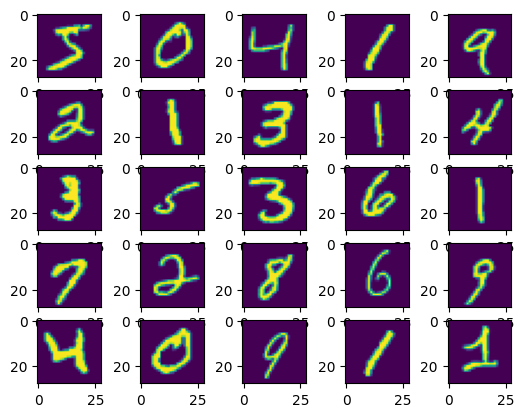

In [3]:
(tr_x, tr_y), (te_x, te_y) = tf.keras.datasets.mnist.load_data()
for i in range(25):
  ax = plt.subplot(5, 5, i+1)
  plt.imshow(tr_x[i])


tr_x = tr_x.reshape(-1, 28*28).astype('float32')/255.
te_x = te_x.reshape(-1, 28*28).astype('float32')/255.

### Task 2.2: Build the model

Apply the 'sequential' approach to build a simple Autoencoder model. In the encoder part, we add three hidden layers (dense layer) with 128, 64, and 32 neurons respectively. Correspondingly, we include three hidden layers with 64, 128, and 784 neurons respectively in the decoder part. All neurons except the last hidden layer use the Relu function as activation function. Since the all the pixel values have been normalized, all the neurons in the last hidden layer should equip with 'sigmoid' function as activation functions. Once the Autoencoder model is ready, use 'summary' method to visualize the structure of the model. 

In [4]:
# solutions
model = Sequential([
  layers.InputLayer(input_shape=(28 * 28)),
  layers.Dense(128, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(784, activation="sigmoid"),
])
print(model.summary())

2022-12-10 14:58:25.559234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-10 14:58:25.559715: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-10 14:58:25.559761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MiWiFi-R4CM-srv): /proc/driver/nvidia/version does not exist
2022-12-10 14:58:25.560821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

### Task 2.3: Compile the model

Choose a proper loss function, use 'Adam' optimizer with learing rate $0.01$, and specify 'mse' as performance metric to compile the model define in the previous subtask.

In [5]:
# solutions
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics=["mse"],
)


### Task 2.4: Training

Train the model with training data 100 epochs. Setting the 'batch_size' as 256 and applying 'shuffle' could be a good idea.  

In [6]:
# solutionsp
model.fit(tr_x, tr_x, batch_size=256, epochs=100, shuffle=True)


2022-12-10 14:58:25.930354: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-12-10 14:58:26.148750: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
235/235 [==============================] - 6s 14ms/step - loss: 0.0492 - mse: 0.0492
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0253 - mse: 0.0253
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0211 - mse: 0.0211
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0191 - mse: 0.0191
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0178 - mse: 0.0178
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0170 - mse: 0.0170
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0163 - mse: 0.0163
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0158 - mse: 0.0158
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0154 - mse: 0.0154
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0151 - mse: 0.0151
Epoch 11/100
235/235 [========

# OUR COMMENT

### Learning Result
The final MSE == Loss was 0.0116.

### Task 2.5: Visulazing the approximated image 

Apply 'predict' method to reconstruct the images both in training set and testing set. Randomly visualize 25 reconstructed images from both sets. 

   1/1875 [..............................] - ETA: 3:55

2022-12-10 15:02:38.799303: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step


2022-12-10 15:02:45.465039: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


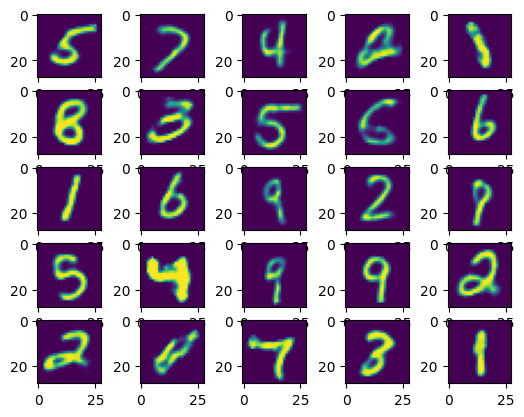

In [7]:
# solutions
import numpy as np
predicted = model.predict(tr_x)
# Shuffle to get random first 25 images
np.random.shuffle(predicted)

for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(predicted[i].reshape(28, 28))

313/313 [==============================] - 1s 2ms/step


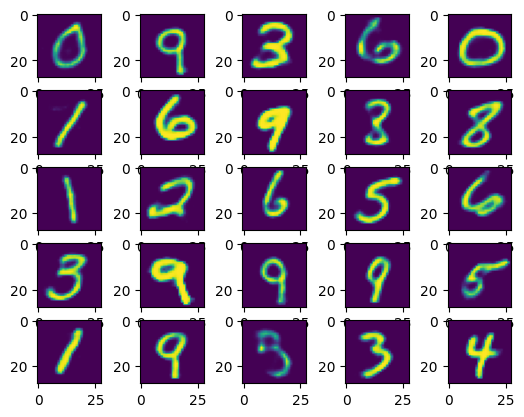

In [8]:
predicted = model.predict(te_x)
np.random.shuffle(predicted)
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(predicted[i].reshape(28, 28))


# OUR COMMENT

We can observe that the images from training set were reconstructed with higher quality than the images form test test.
That's because the model optimized its loss based on training set.

### Task 2.6: Extract the features

All the neurons of the last layer in the encoder part can be viewed as extracted features. Please write a program to extract all the feature variables of images both in training set and testing set. 

**Tips**: Recall how we defined a regression model with pre-determined coefficients in the first example notebook.

In [9]:
# solutions
model_extract = Sequential([
  layers.InputLayer(input_shape=(28 * 28)), 
  layers.Dense(128, activation="relu", weights=model.layers[0].get_weights()),
  layers.Dense(64, activation="relu", weights=model.layers[1].get_weights()),
  layers.Dense(32, weights=model.layers[2].get_weights())
])


# Not sure if we are supposed to keep relu in the last layer.
extracted_tr = model_extract.predict(tr_x)
extracted_te = model_extract.predict(te_x)


  23/1875 [..............................] - ETA: 4s  

2022-12-10 15:02:52.955689: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


### Task 2.7: Train multinomial regression models

There are 32 extracted features based on the Autoencoder model and we are going to replace the 784 raw pixel values with them. In other words, we have significantly reduced the dimension of our problem. Although our Autoencoder has only a very simple architecture, the extracted feature is still very useful. Suppose we have a large set of images, however, only 100 observations are annotated, i.e. have target variable (labels). If we use the raw pixel variables as predictors (features) to train a multinomial regression model using the 100 annotated observations, then there must be a high risk of overfitting problems. However, if we train the multinomial regression model using extracted 32 neurons as predictors, then could reduce this risk and improve the generalization ability. 

**Task**: train two multinomial regression models using the first 100 observations in the training set. The first model uses the 784 raw pixels as input and the second model use the 32 extracted features as inputs. Compare the performance of the two models in the testing set.

**Tips**: How to train a multinomial regression in Tensorflow? Let's think about another question instead. Imagine, if we have a binary classification neural network model with no hidden layers, and the activation function of the output layer is the sigmoid function, then what statistical model is this model equivalent to?

In [10]:
subsampled_extracted_xr = extracted_tr[:100]
subsampled_x = tr_x[:100]
subsampled_y = tr_y[:100]

In [11]:
# solutions
model_encoded = Sequential([
  layers.InputLayer(input_shape=(32)), 
  layers.Dense(10)
])


model_encoded.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model_encoded.fit(subsampled_extracted_xr, subsampled_y, batch_size=256, epochs=1000, shuffle=True)

Epoch 1/1000
1/1 [==============================] - 0s 407ms/step - loss: 13.1701 - accuracy: 0.1300
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.9606 - accuracy: 0.1300
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 12.7512 - accuracy: 0.1300
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 12.5420 - accuracy: 0.1300
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 12.3331 - accuracy: 0.1300
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 12.1245 - accuracy: 0.1300
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.9164 - accuracy: 0.1300
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 11.7089 - accuracy: 0.1300
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 11.5022 - accuracy: 0.1300
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 11.2964 - accuracy: 0.1300
Epoch

In [12]:

model_chunky = Sequential([
  layers.InputLayer(input_shape=(28 * 28)), 
  layers.Dense(10),
])

model_chunky.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model_chunky.fit(subsampled_x, subsampled_y, batch_size=256, epochs=50, shuffle=True)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.4152 - accuracy: 0.0700
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 2.3464 - accuracy: 0.1000
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 2.2801 - accuracy: 0.2000
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 2.2161 - accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 2.1544 - accuracy: 0.2200
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 2.0948 - accuracy: 0.2600
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 2.0371 - accuracy: 0.2600
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 1.9812 - accuracy: 0.2900
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 1.9269 - accuracy: 0.3400
Epoch 10/50
1/1 [==============================] - 0s 17ms/step - loss: 1.8741 - accuracy: 0.3600
Epoch 11/50
1/1 [================

In [13]:
model_encoded.evaluate(extracted_te, te_y)
model_chunky.evaluate(te_x, te_y)

313/313 [==============================] - 1s 2ms/step - loss: 1.3181 - accuracy: 0.6427


[1.3180807828903198, 0.6427000164985657]

# OUR COMMENT

We observed that the model using extracted features took more epochs to train.
We aim for similar accuracy on the training sets which was achieved at 97% by both models.
We observed that the model using extracted features had a higher accuracy on the test set by 9%.
This means that is generalizes better.

However both models were overfitting a lot.